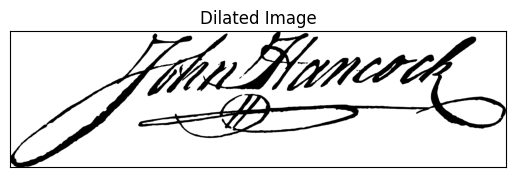

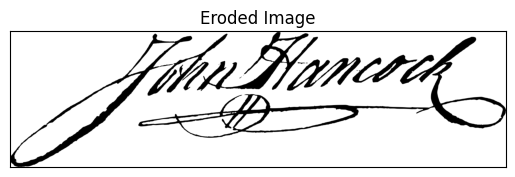

In [4]:
# 02
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

img = cv.imread('JohnHancocksSignature.png', cv.IMREAD_UNCHANGED)

if img is None:
    print('Image load failed')
    sys.exit()
    
se = np.uint8([[1],
               [1]])

dilation = cv.dilate(img, se, iterations=1)
plt.imshow(dilation, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title('Dilated Image')
plt.show()

erosion = cv.erode(img, se, iterations=1)
plt.imshow(erosion, cmap='gray')
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.title('Eroded Image')
plt.show()

### 히스토그램 평활화
s_k = round( (L - 1) * CDF(k) )

In [ ]:
# 04
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')                             # 이미지 불러오기

# 2) 그레이스케일 변환 + 텍스트 추가
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)                # 컬러 → 흑백으로 변환
cv.imshow('gray', gray)                                 # 그레이스케일 이미지 출력

# 수평 엣지 검출을 위한 커널 정의
fedge_h = np.array([
    [-1.0, -1.0, -1.0],
    [ 0.0,  0.0,  0.0],
    [ 1.0,  1.0,  1.0]
])

# 샤프닝 효과를 위한 커널 정의
fsharp = np.array([
    [ 0.0, -1.0,  0.0],
    [-1.0,  4.0, -1.0],
    [ 0.0, -1.0,  0.0]
])

# 엠보싱 효과를 위한 커널 정의
femboss = np.array([
    [-1.0, 0.0, 0.0],
    [ 0.0, 0.0, 0.0],
    [ 0.0, 0.0, 1.0]
])

# 3) 수평 엣지 검출
edge_h = cv.filter2D(gray, -1, fedge_h)                  # 필터 적용
cv.imshow('edge_h', edge_h)                               # 결과 출력

# 4) 샤프닝 효과 적용
sharp = cv.filter2D(gray, -1, fsharp)
sharp = np.uint8(np.clip(sharp, 0, 255))                  # uint8로 변환
cv.imshow('sharp', sharp)

# 5) 엠보싱 효과 적용
gray16 = np.int16(gray)                                  
emboss = np.uint8(
    np.clip(cv.filter2D(gray16, -1, femboss) + 128, 0, 255)
)
cv.imshow('emboss', emboss)                              

cv.waitKey(0)
cv.destroyAllWindows()

| 효과       | 핵심 목적     | 커널 특징        | 대표 변화         |
| -------- | --------- | ------------ | ------------- |
| 수평 엣지 검출 | 수평 경계 강조  | 상-하 방향 차이    | 경계만 밝고 배경 어두움 |
| 샤프닝      | 전체 경계 선명화 | 중심 강조, 주변 억제 | 흐릿한 이미지 선명하게  |
| 엠보싱      | 입체감(양각)   | 대각선 차이, +128 | 빛이 비친 듯한 효과   |

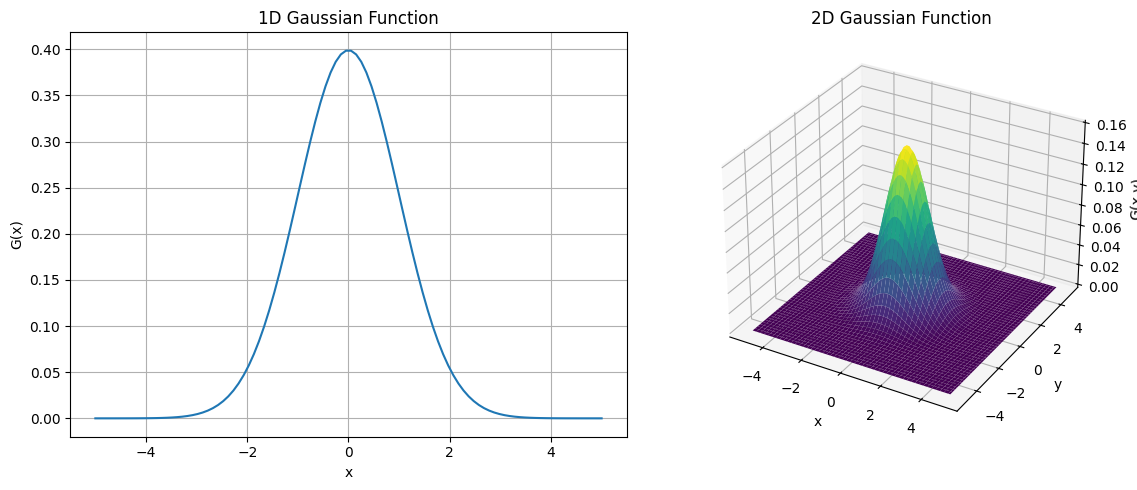

In [5]:
# 06
import numpy as np
import matplotlib.pyplot as plt

# 파라미터
sigma = 1.0
mean = 0.0

# 1차원 가우시안 함수
def gaussian_1d(x, mu, sigma):
    return (1.0 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# 2차원 가우시안 함수
def gaussian_2d(x, y, mu, sigma):
    return (1.0 / (2 * np.pi * sigma**2)) * np.exp(- ((x - mu)**2 + (y - mu)**2) / (2 * sigma**2))

# 1D 그리기
x = np.linspace(-5, 5, 100)
y1d = gaussian_1d(x, mean, sigma)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y1d)
plt.title('1D Gaussian Function')
plt.xlabel('x')
plt.ylabel('G(x)')
plt.grid(True)

# 2D 그리기
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = gaussian_2d(X, Y, mean, sigma)

from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('2D Gaussian Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('G(x,y)')

plt.tight_layout()
plt.show()


In [5]:
# 07
import cv2 as cv
import numpy as np

img = cv.imread('soccer.jpg')                             # 이미지 불러오기
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
# cv.imshow('gray', gray)                                   # 변환된 흑백 이미지 띄우기

# 3) 가우시안 블러(스무딩) 강도 비교
# 커널 크기가 커질수록 더 많이 흐려짐
smooth = cv.GaussianBlur(gray, (7, 7), 0.0)                 # 5x5 블러
median = cv.medianBlur(gray, 7)

cv.imshow('smooth', smooth)
cv.imshow('median', median)

cv.waitKey(0)
cv.destroyAllWindows()

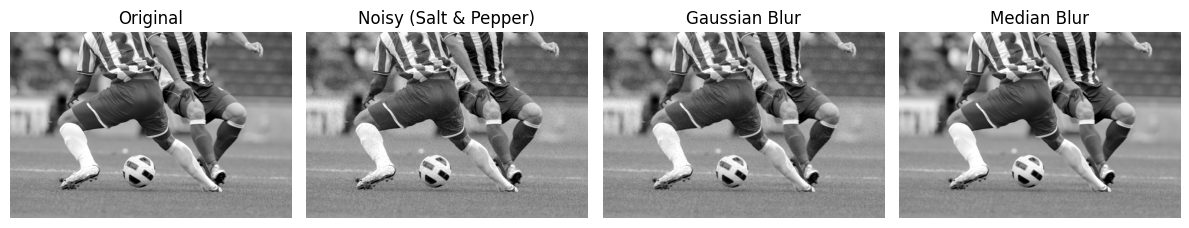

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 → 그레이스케일
img = cv.imread('soccer.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    print("이미지를 불러올 수 없습니다.")
    exit()

# ------------------------------
# 1) Salt & Pepper 노이즈 추가
# ------------------------------
def add_salt_pepper_noise(image, prob):
    output = np.copy(image)
    # Salt (흰 점)
    num_salt = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    output[coords[0], coords[1]] = 255

    # Pepper (검은 점)
    num_pepper = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    output[coords[0], coords[1]] = 0

    return output

noisy = add_salt_pepper_noise(img, 0.02)

# ------------------------------
# 2) Gaussian Blur
# ------------------------------
gaussian = cv.GaussianBlur(noisy, (5, 5), 0)

# ------------------------------
# 3) Median Blur
# ------------------------------
median = cv.medianBlur(noisy, 5)

# ------------------------------
# 4) 결과 시각화
# ------------------------------
titles = ['Original', 'Noisy (Salt & Pepper)', 'Gaussian Blur', 'Median Blur']
images = [img, noisy, gaussian, median]

plt.figure(figsize=(12, 6))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

| 비교     | 가우시안 블러    | 미디언 블러            |
| ------ | ---------- | ----------------- |
| 원리     | 가우시안 가중 평균 | 중앙값 선택            |
| 이상치 제거 | 보통         | 매우 강력 (소금-후추 노이즈) |
| 엣지 유지  | 일부 흐려짐     | 엣지 잘 유지           |
| 효과     | 자연스러운 블러   | 경계 유지하면서 잡음 제거    |
| 속도     | 빠름         | 상대적으로 느림 (정렬 연산)  |

In [16]:
# 09
import cv2 as cv

def draw(event, x, y, flags, param):
    global ix, iy
    
    if event == cv.EVENT_LBUTTONDOWN:
        ix, iy = x, y
    elif event == cv.EVENT_LBUTTONUP:
        # 안전하게 좌표 정렬!
        x1, x2 = min(ix, x), max(ix, x)
        y1, y2 = min(iy, y), max(iy, y)

        # 선택 영역 추출
        patch = img[y1:y2, x1:x2, :]
        
        # 너무 작은 영역 방지
        if patch.size == 0:
            print("선택 영역이 너무 작습니다.")
            return

        patch1 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_NEAREST)
        patch2 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_LINEAR)
        patch3 = cv.resize(patch, dsize=(0, 0), fx=5, fy=5, interpolation=cv.INTER_CUBIC)

        # 결과 출력
        cv.imshow('Nearest Neighbor', patch1)
        cv.imshow('Bilinear', patch2)
        cv.imshow('Bicubic', patch3)
        
img = cv.imread('rose.png')

cv.namedWindow('Original Image')
cv.imshow('Original Image', img)
cv.setMouseCallback('Original Image', draw)

cv.waitKey(0)
cv.destroyAllWindows()